In [1]:
# -------------------------------------------------------------------------------
# import packages
import import_ipynb
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------------
# import scripts
from preprocessing_scripts.data_processing import hiring_data
import functions.algorithmic_model as am
import functions.simulation_vis as sm_vis
import functions.qualification as qual_plot

In [2]:
# data to X and y
X = hiring_data.drop(columns=['decision', 'Id', 'sport'])
y = hiring_data['decision']

beta = [0, 0.2, 0.6]

# Logistic Model - No Group Fairness

In [3]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_1 = []
labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_1 = []
qual_female_first_stage_df_lm_1 = []

qual_male_second_stage_df_lm_1 = []
qual_female_second_stage_df_lm_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_1, gender_shares2, 
     qual_male_first_stage, qual_female_first_stage, 
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.logistic_regression(X, y, "logistic", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_1.append(all_selected_lm_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_1.append(flat_qualification_male)
    qual_female_second_stage_df_lm_1.append(flat_qualification_female)


------------------------------
Mean: 0.34102525315109006
Mean: 0.2888
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.372
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773
------------------------------
Mean: 0.34102525315109006
Mean: 0.4966
------------------------------
Mean Male Qualification: 61.97336602676972
Mean Female Qualification: 67.11997861729773


In [4]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1          149           87]

In [5]:
fairness_metrics_list

[{'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.5761589403973509,
  'female_fnr': 0.7294117647058823,
  'male_tnr': 0.8389513108614233,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 64, 'fp': 43, 'fn': 87, 'tn': 224},
  'female_cm': {'tp': 23, 'fp': 21, 'fn': 62, 'tn': 260}},
 {'tpr_difference': 0.15325282430853138,
  'fpr_difference': 0.08631559305316754,
  'fnr_difference': 0.15325282430853138,
  'tnr_difference': 0.0863155930531675,
  'equalized_odds_difference': 0.11978420868084946,
  'male_tpr': 0.423841059602649,
  'female_tpr': 0.27058823529411763,
  'male_fpr': 0.16104868913857678,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.576158940397350

In [6]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)


   beta_index  male_mean_qual  female_mean_qual
0           0       62.523588         67.709505
1           1       62.515160         67.681529
2           2       62.535213         67.589988


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


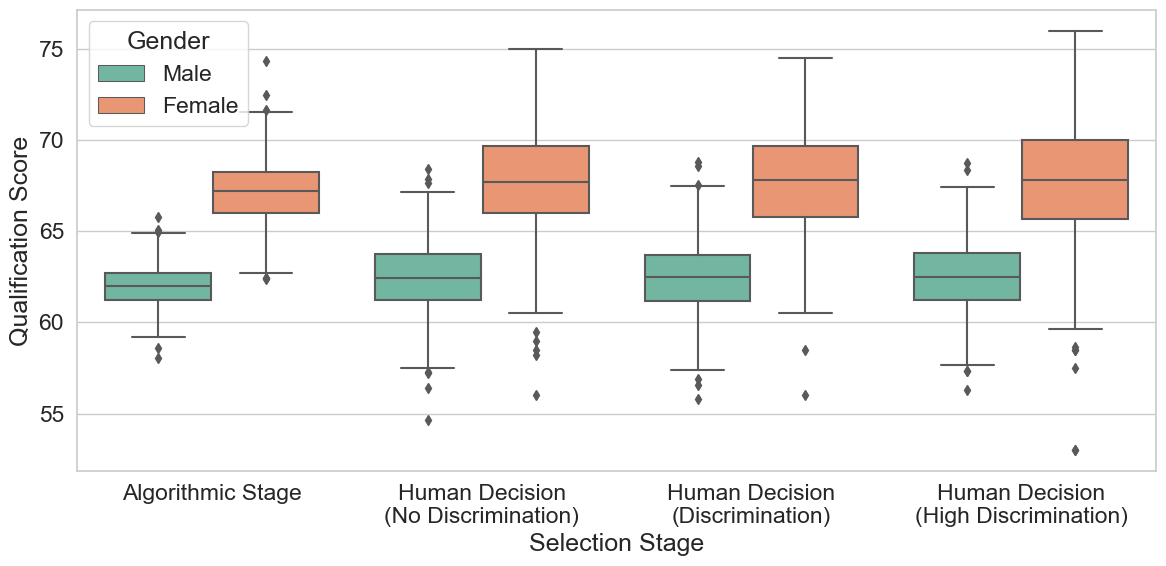

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [7]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - No Group Fairness

In [8]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_1 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_1 = []
qual_female_first_stage_df_rf_1 = []

qual_male_second_stage_df_rf_1 = []
qual_female_second_stage_df_rf_1 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_1, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics) = am.random_forest_model(X,y, "random_forest", discrimination, enforce_fairness=False)

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_rf_1.append(all_selected_rf_1)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_1.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_1.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_1.append(flat_qualification_male)
    qual_female_second_stage_df_rf_1.append(flat_qualification_female)

------------------------------
Mean: 0.2388046869602856
Mean: 0.21
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.3098
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633
------------------------------
Mean: 0.2388046869602856
Mean: 0.4214
------------------------------
Mean Male Qualification: 61.92360740716544
Mean Female Qualification: 65.88340378707633


In [9]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158,
           Predicted 0  Predicted 1
 Actual 0          504           44
 Actual 1           78          158]

In [10]:
fairness_metrics_list

[{'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.33774834437086093,
  'female_fnr': 0.3176470588235294,
  'male_tnr': 0.9138576779026217,
  'female_tnr': 0.9252669039145908,
  'male_cm': {'tp': 100, 'fp': 23, 'fn': 51, 'tn': 244},
  'female_cm': {'tp': 58, 'fp': 21, 'fn': 27, 'tn': 260}},
 {'tpr_difference': 0.020101285547331482,
  'fpr_difference': 0.011409226011969031,
  'fnr_difference': 0.020101285547331538,
  'tnr_difference': 0.011409226011969031,
  'equalized_odds_difference': 0.015755255779650257,
  'male_tpr': 0.6622516556291391,
  'female_tpr': 0.6823529411764706,
  'male_fpr': 0.08614232209737828,
  'female_fpr': 0.07473309608540925,
  'male_fnr': 0.3

In [11]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_1):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0       62.469256         66.460000
1           1       62.463277         66.394958
2           2       62.458984         66.285862


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


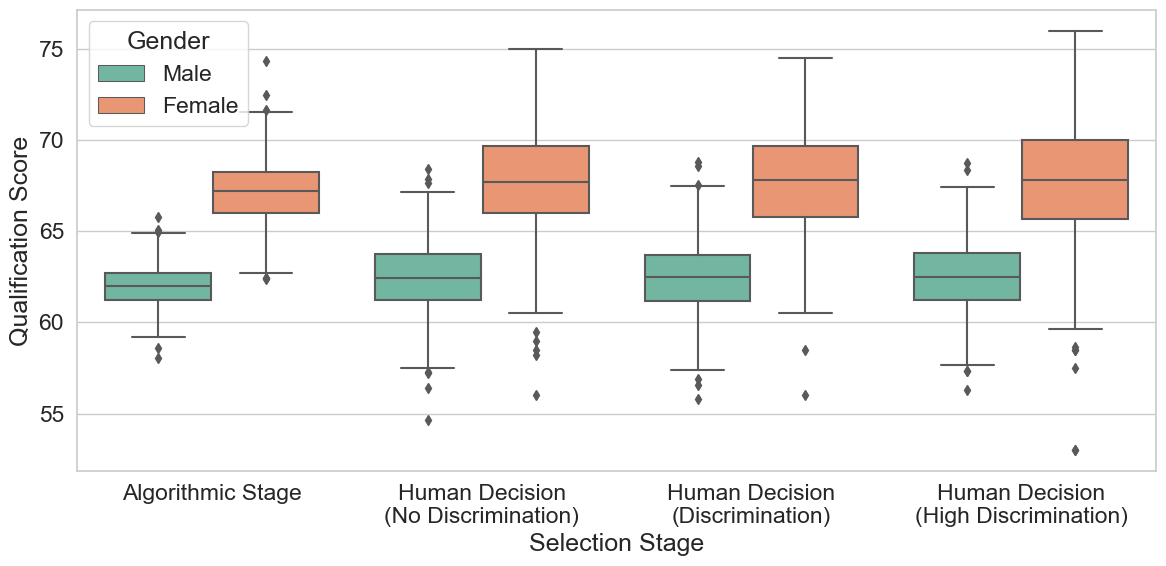

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [12]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Statistical Parity

In [13]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_2 = []
qual_female_first_stage_df_lm_2 = []

qual_male_second_stage_df_lm_2 = []
qual_female_second_stage_df_lm_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_lm_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_2.append(all_selected_lm_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_2.append(flat_qualification_male)
    qual_female_second_stage_df_lm_2.append(flat_qualification_female)

------------------------------
Mean: 0.06137217156921751
Mean: 0.007999999999999998
------------------------------
Mean Male Qualification: 62.0595492910209
Mean Female Qualification: 66.63422550400527
------------------------------
Mean: 0.06282646465856677
Mean: 0.086
------------------------------
Mean Male Qualification: 62.05738828528444
Mean Female Qualification: 66.6394135870652
------------------------------
Mean: 0.06210024450936673
Mean: 0.2152
------------------------------
Mean Male Qualification: 62.0635990464457
Mean Female Qualification: 66.62575871905763


In [14]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          467           81
 Actual 1          141           95,
           Predicted 0  Predicted 1
 Actual 0          467           81
 Actual 1          142           94,
           Predicted 0  Predicted 1
 Actual 0          468           80
 Actual 1          141           95]

In [15]:
fairness_metrics_list

[{'tpr_difference': 0.032800934943513826,
  'fpr_difference': 0.0033987764404814214,
  'fnr_difference': 0.03280093494351388,
  'tnr_difference': 0.003398776440481366,
  'equalized_odds_difference': 0.018099855691997624,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4235294117647059,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1494661921708185,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.5764705882352941,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8505338078291815,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 36, 'fp': 42, 'fn': 49, 'tn': 239}},
 {'tpr_difference': 0.02103622906116087,
  'fpr_difference': 0.0033987764404814214,
  'fnr_difference': 0.02103622906116087,
  'tnr_difference': 0.003398776440481366,
  'equalized_odds_difference': 0.012217502750821146,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4117647058823529,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.1494661921708185,
  'male_fnr': 0.60927

In [16]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.638621          0.702324
1           1        0.640285          0.700909
2           2        0.640959          0.699960


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


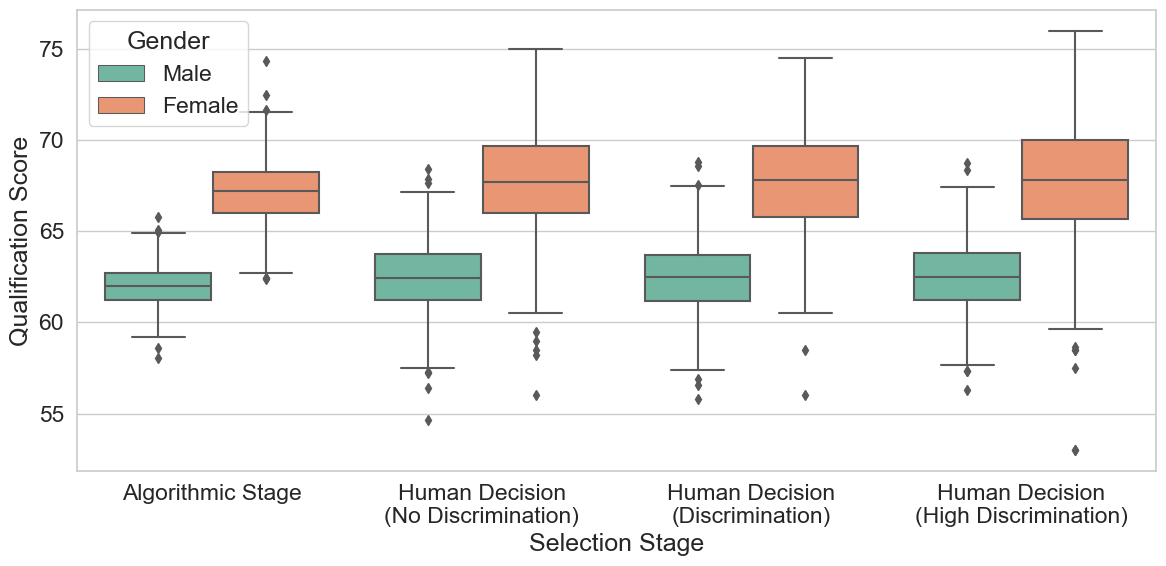

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [17]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Statistical Parity

In [18]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_2 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_2 = []
qual_female_first_stage_df_rf_2 = []

qual_male_second_stage_df_rf_2 = []
qual_female_second_stage_df_rf_2 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta: 
    (X_train, y_train, model, gender_shares1, all_selected_rf_2, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="demographic_parity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_2.append(all_selected_rf_2)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_2.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_2.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_2.append(flat_qualification_male)
    qual_female_second_stage_df_rf_2.append(flat_qualification_female)

------------------------------
Mean: -0.0032954796811532263
Mean: 0.014600000000000002
------------------------------
Mean Male Qualification: 62.40225489033832
Mean Female Qualification: 65.35684326203331
------------------------------
Mean: -0.0046127405075759515
Mean: 0.0724
------------------------------
Mean Male Qualification: 62.401009424887576
Mean Female Qualification: 65.37191574804183
------------------------------
Mean: -0.0028510913975460296
Mean: 0.2296
------------------------------
Mean Male Qualification: 62.39984270771653
Mean Female Qualification: 65.37941888456838


In [19]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          478           70
 Actual 1           75          161,
           Predicted 0  Predicted 1
 Actual 0          488           60
 Actual 1           75          161,
           Predicted 0  Predicted 1
 Actual 0          485           63
 Actual 1           75          161]

In [20]:
fairness_metrics_list

[{'tpr_difference': 0.2760420724581223,
  'fpr_difference': 0.13224572487237926,
  'fnr_difference': 0.27604207245812235,
  'tnr_difference': 0.1322457248723793,
  'equalized_odds_difference': 0.2041438986652508,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8588235294117647,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.19217081850533807,
  'male_fnr': 0.41721854304635764,
  'female_fnr': 0.1411764705882353,
  'male_tnr': 0.9400749063670412,
  'female_tnr': 0.8078291814946619,
  'male_cm': {'tp': 88, 'fp': 16, 'fn': 63, 'tn': 251},
  'female_cm': {'tp': 73, 'fp': 54, 'fn': 12, 'tn': 227}},
 {'tpr_difference': 0.2760420724581223,
  'fpr_difference': 0.09665853626027962,
  'fnr_difference': 0.27604207245812235,
  'tnr_difference': 0.09665853626027965,
  'equalized_odds_difference': 0.18635030435920097,
  'male_tpr': 0.5827814569536424,
  'female_tpr': 0.8588235294117647,
  'male_fpr': 0.0599250936329588,
  'female_fpr': 0.15658362989323843,
  'male_fnr': 0.41721854304635764,

In [21]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_2):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.650194          0.651379
1           1        0.654760          0.649639
2           2        0.655792          0.652274


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


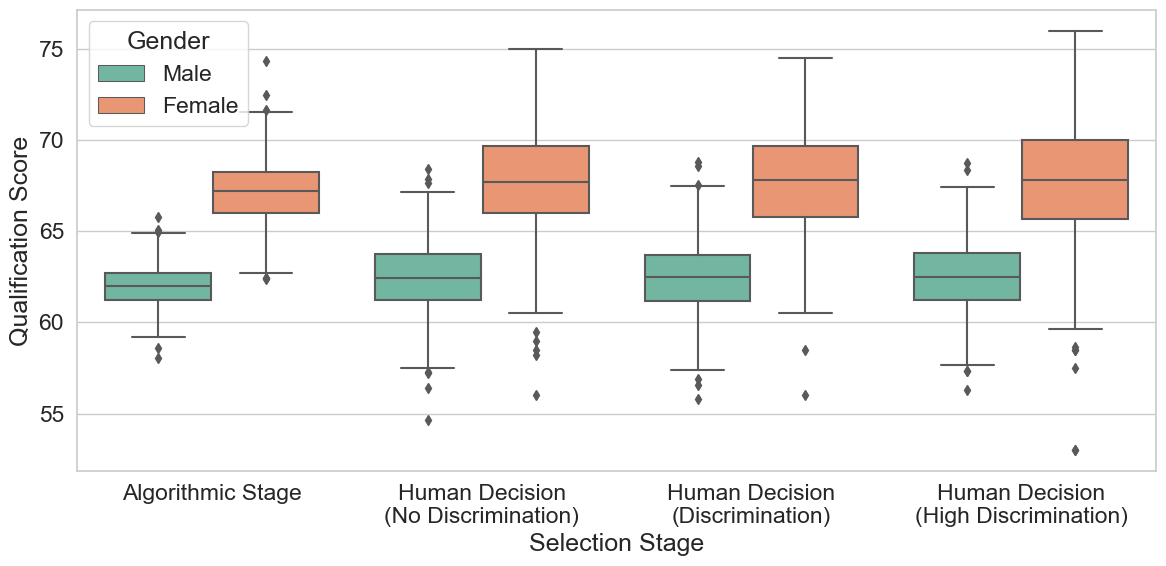

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [22]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equalized Odds

In [23]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_3 = []
qual_female_first_stage_df_lm_3 = []

qual_male_second_stage_df_lm_3 = []
qual_female_second_stage_df_lm_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)
    
    # get all_selected for each into results
    results_lm_3.append(all_selected_lm_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_3.append(flat_qualification_male)
    qual_female_second_stage_df_lm_3.append(flat_qualification_female)

------------------------------
Mean: 0.10544796513232056
Mean: 0.048600000000000004
------------------------------
Mean Male Qualification: 62.05491513497399
Mean Female Qualification: 66.64875147008082
------------------------------
Mean: 0.10496720970706286
Mean: 0.1328
------------------------------
Mean Male Qualification: 62.05172325973201
Mean Female Qualification: 66.62832143682053
------------------------------
Mean: 0.1054110883502367
Mean: 0.2712
------------------------------
Mean Male Qualification: 62.04928582729314
Mean Female Qualification: 66.64296872550194


In [24]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          473           75
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          471           77
 Actual 1          143           93,
           Predicted 0  Predicted 1
 Actual 0          473           75
 Actual 1          142           94]

In [25]:
fairness_metrics_list

[{'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.017953536726778352,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.017953536726778352,
  'equalized_odds_difference': 0.010223359715161667,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12811387900355872,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.611764705882353,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8718861209964412,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 33, 'fp': 36, 'fn': 52, 'tn': 245}},
 {'tpr_difference': 0.009271523178807972,
  'fpr_difference': 0.010836099004358418,
  'fnr_difference': 0.009271523178807972,
  'tnr_difference': 0.010836099004358446,
  'equalized_odds_difference': 0.010053811091583195,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.4,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.13523131672597866,
  'male_fnr': 0.609271523178808

In [26]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.639023          0.701179
1           1        0.641623          0.699523
2           2        0.640128          0.696748


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


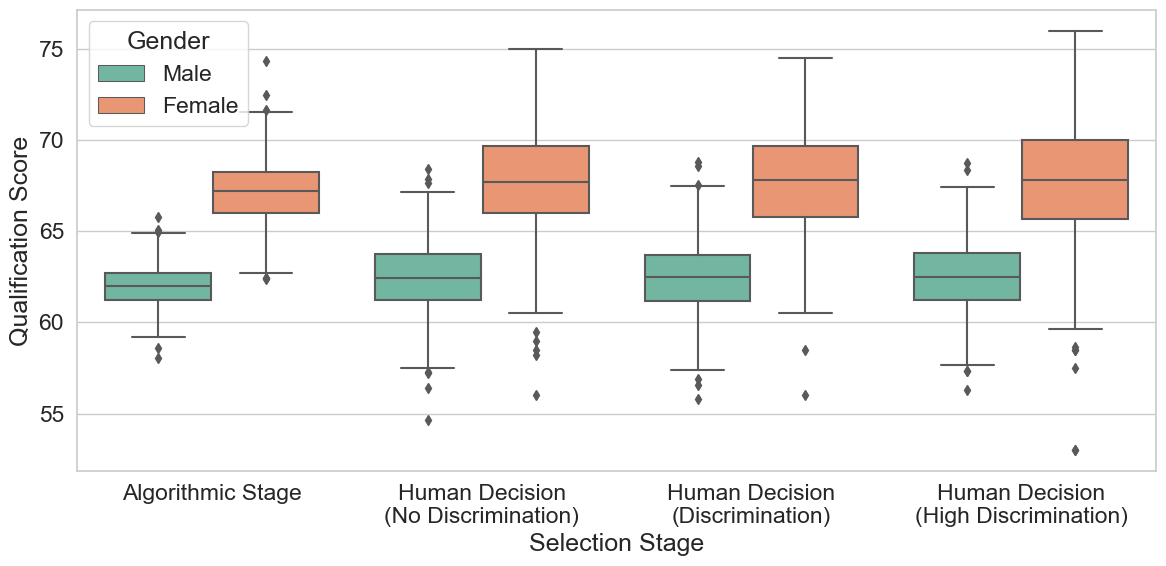

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [27]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equalized Odds

In [28]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_3 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_3 = []
qual_female_first_stage_df_rf_3 = []

qual_male_second_stage_df_rf_3 = []
qual_female_second_stage_df_rf_3 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_3, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equalized_odds")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)

    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_3.append(all_selected_rf_3)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_3.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_3.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_3.append(flat_qualification_male)
    qual_female_second_stage_df_rf_3.append(flat_qualification_female)

------------------------------
Mean: 0.20228003889568152
Mean: 0.2164
------------------------------
Mean Male Qualification: 61.679209102240655
Mean Female Qualification: 65.6317202331909
------------------------------
Mean: 0.2017598243574106
Mean: 0.3006
------------------------------
Mean Male Qualification: 61.67201523328153
Mean Female Qualification: 65.63376775034993
------------------------------
Mean: 0.2024113386780931
Mean: 0.4214
------------------------------
Mean Male Qualification: 61.66290138574461
Mean Female Qualification: 65.63397993894623


In [29]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          485           63
 Actual 1           56          180,
           Predicted 0  Predicted 1
 Actual 0          484           64
 Actual 1           57          179,
           Predicted 0  Predicted 1
 Actual 0          488           60
 Actual 1           56          180]

In [30]:
fairness_metrics_list

[{'tpr_difference': 0.039890923256719835,
  'fpr_difference': 0.0022258653551388285,
  'fnr_difference': 0.03989092325671992,
  'tnr_difference': 0.002225865355138801,
  'equalized_odds_difference': 0.02105839430592933,
  'male_tpr': 0.7483443708609272,
  'female_tpr': 0.788235294117647,
  'male_fpr': 0.11610486891385768,
  'female_fpr': 0.11387900355871886,
  'male_fnr': 0.25165562913907286,
  'female_fnr': 0.21176470588235294,
  'male_tnr': 0.8838951310861424,
  'female_tnr': 0.8861209964412812,
  'male_cm': {'tp': 113, 'fp': 31, 'fn': 38, 'tn': 236},
  'female_cm': {'tp': 67, 'fp': 32, 'fn': 18, 'tn': 249}},
 {'tpr_difference': 0.04651343981301126,
  'fpr_difference': 0.005971183707198749,
  'fnr_difference': 0.04651343981301129,
  'tnr_difference': 0.005971183707198735,
  'equalized_odds_difference': 0.026242311760105004,
  'male_tpr': 0.7417218543046358,
  'female_tpr': 0.788235294117647,
  'male_fpr': 0.1198501872659176,
  'female_fpr': 0.11387900355871886,
  'male_fnr': 0.258278

In [31]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_3):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.658292          0.650360
1           1        0.660047          0.655042
2           2        0.658891          0.653771


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


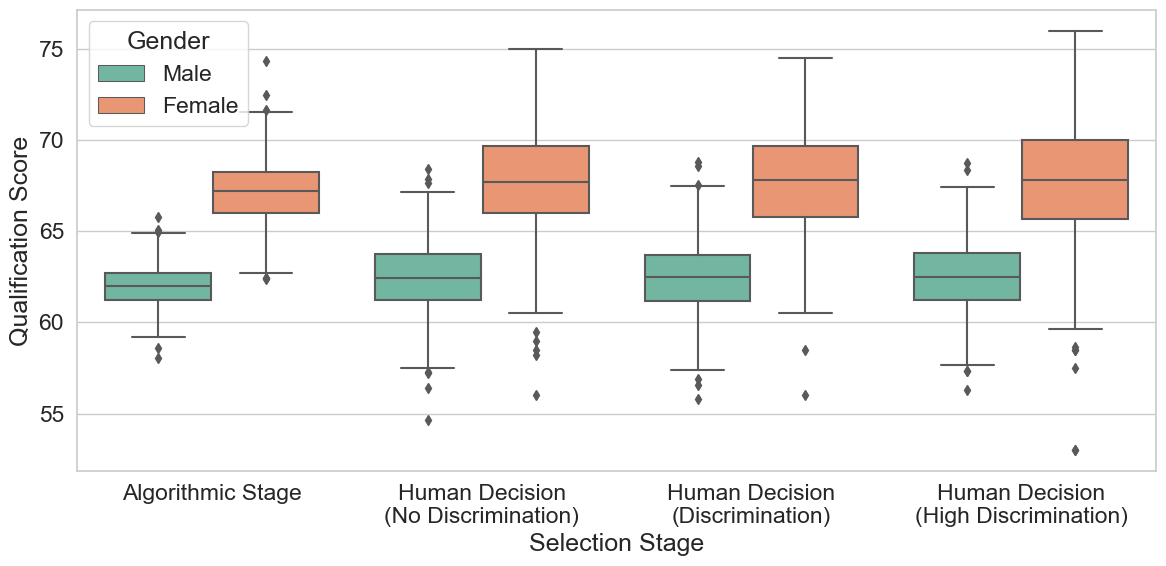

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [32]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Logistic Model - Equal Opportunity

In [33]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_lm_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_lm_4 = []
qual_female_first_stage_df_lm_4 = []

qual_male_second_stage_df_lm_4 = []
qual_female_second_stage_df_lm_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_lm_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.logistic_regression(X,y, "logistic_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_lm_4.append(all_selected_lm_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_lm_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_lm_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_lm_4.append(flat_qualification_male)
    qual_female_second_stage_df_lm_4.append(flat_qualification_female)

------------------------------
Mean: 0.1126935590436225
Mean: 0.049800000000000004
------------------------------
Mean Male Qualification: 62.058874732650345
Mean Female Qualification: 66.71070406708202
------------------------------
Mean: 0.11288002324483919
Mean: 0.1456
------------------------------
Mean Male Qualification: 62.0571598077303
Mean Female Qualification: 66.70607837250618
------------------------------
Mean: 0.11285427360979439
Mean: 0.266
------------------------------
Mean Male Qualification: 62.05908651945631
Mean Female Qualification: 66.7120114743201


In [34]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          475           73
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          474           74
 Actual 1          144           92,
           Predicted 0  Predicted 1
 Actual 0          473           75
 Actual 1          144           92]

In [35]:
fairness_metrics_list

[{'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.025070974449198286,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.025070974449198258,
  'equalized_odds_difference': 0.013782078576371634,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12099644128113879,
  'male_fnr': 0.609271523178808,
  'female_fnr': 0.611764705882353,
  'male_tnr': 0.8539325842696629,
  'female_tnr': 0.8790035587188612,
  'male_cm': {'tp': 59, 'fp': 39, 'fn': 92, 'tn': 228},
  'female_cm': {'tp': 33, 'fp': 34, 'fn': 52, 'tn': 247}},
 {'tpr_difference': 0.0024931827035449827,
  'fpr_difference': 0.02151225558798832,
  'fnr_difference': 0.0024931827035450382,
  'tnr_difference': 0.021512255587988305,
  'equalized_odds_difference': 0.01200271914576665,
  'male_tpr': 0.39072847682119205,
  'female_tpr': 0.38823529411764707,
  'male_fpr': 0.14606741573033707,
  'female_fpr': 0.12455516014234876,
  'male_fnr': 0

In [36]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_lm_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.640104          0.701750
1           1        0.640795          0.700932
2           2        0.641210          0.698258


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


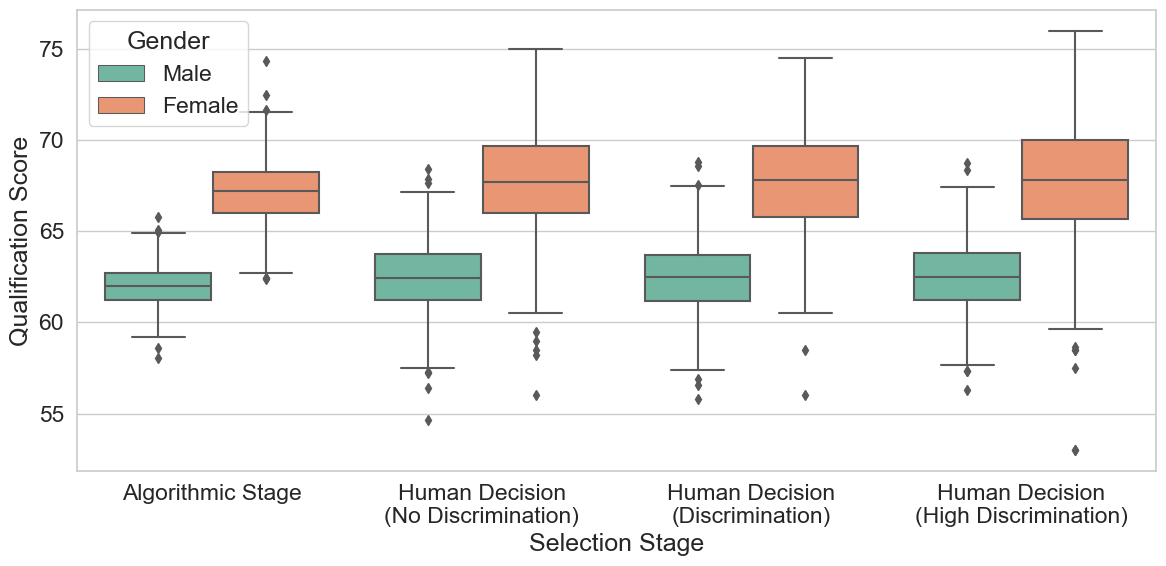

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [37]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Random Forest Model - Equal Opportunity

In [38]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

results_rf_4 = []

labels = ['Second Stage A', 'Second Stage B', 'Second Stage C']

qual_male_first_stage_df_rf_4 = []
qual_female_first_stage_df_rf_4 = []

qual_male_second_stage_df_rf_4 = []
qual_female_second_stage_df_rf_4 = []

cm_df_list = []
fairness_metrics_list = []

for discrimination in beta:
    (X_train, y_train, model, gender_shares1, all_selected_rf_4, gender_shares2,
     qual_male_first_stage, qual_female_first_stage,
     qual_male_second_stage, qual_female_second_stage, cm_df, fairness_metrics)  = am.random_forest_model(X,y, "random_forest_fair", discrimination, enforce_fairness=True, fairness_constraint="equal_opportunity")

    cm_df_list.append(cm_df)
    fairness_metrics_list.append(fairness_metrics)
    
    print("-"*30)

    # get mean of gender shares of list
    mean_value = statistics.mean(gender_shares1)
    print("Mean:", mean_value)

    # get mean for gender share 2
    mean_value = statistics.mean(gender_shares2)
    print("Mean:", mean_value)

    # get all_selected for each into results
    results_rf_4.append(all_selected_rf_4)

    print("-"*30)

    # Extract the values from each Series in the list and flatten it
    flat_qualification_male = [item.mean() for item in qual_male_first_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_first_stage if not item.empty]

    # Now, calculate the overall mean of the male qualifications
    mean_male_qualification = statistics.mean(flat_qualification_male)
    print("Mean Male Qualification:", mean_male_qualification)
    qual_male_first_stage_df_rf_4.append(flat_qualification_male)

    # get qual_female_first_stage mean
    mean_female_qualification = statistics.mean(flat_qualification_female)
    print("Mean Female Qualification:", mean_female_qualification)
    qual_female_first_stage_df_rf_4.append(flat_qualification_female)

    # second stage
    flat_qualification_male = [item.mean() for item in qual_male_second_stage if not item.empty]
    flat_qualification_female = [item.mean() for item in qual_female_second_stage if not item.empty]

    # append
    qual_male_second_stage_df_rf_4.append(flat_qualification_male)
    qual_female_second_stage_df_rf_4.append(flat_qualification_female)

------------------------------
Mean: 0.16098534723955468
Mean: 0.1848
------------------------------
Mean Male Qualification: 62.13336649147285
Mean Female Qualification: 65.67256127006848
------------------------------
Mean: 0.1637805600672378
Mean: 0.267
------------------------------
Mean Male Qualification: 62.12486117009148
Mean Female Qualification: 65.67718576566389
------------------------------
Mean: 0.16160075780727545
Mean: 0.3888
------------------------------
Mean Male Qualification: 62.13107551247539
Mean Female Qualification: 65.67130725846641


In [39]:
cm_df_list

[          Predicted 0  Predicted 1
 Actual 0          494           54
 Actual 1           68          168,
           Predicted 0  Predicted 1
 Actual 0          492           56
 Actual 1           66          170,
           Predicted 0  Predicted 1
 Actual 0          494           54
 Actual 1           68          168]

In [40]:
fairness_metrics_list

[{'tpr_difference': 0.08258667705492784,
  'fpr_difference': 0.00503818625294894,
  'fnr_difference': 0.08258667705492795,
  'tnr_difference': 0.00503818625294894,
  'equalized_odds_difference': 0.04381243165393839,
  'male_tpr': 0.6821192052980133,
  'female_tpr': 0.7647058823529411,
  'male_fpr': 0.10112359550561797,
  'female_fpr': 0.09608540925266904,
  'male_fnr': 0.31788079470198677,
  'female_fnr': 0.23529411764705882,
  'male_tnr': 0.898876404494382,
  'female_tnr': 0.9039145907473309,
  'male_cm': {'tp': 103, 'fp': 27, 'fn': 48, 'tn': 240},
  'female_cm': {'tp': 65, 'fp': 27, 'fn': 20, 'tn': 254}},
 {'tpr_difference': 0.08772886638098953,
  'fpr_difference': 0.009383288682740881,
  'fnr_difference': 0.08772886638098945,
  'tnr_difference': 0.009383288682740853,
  'equalized_odds_difference': 0.04855607753186521,
  'male_tpr': 0.6887417218543046,
  'female_tpr': 0.7764705882352941,
  'male_fpr': 0.09737827715355805,
  'female_fpr': 0.10676156583629894,
  'male_fnr': 0.311258278

In [41]:
qual_means_per_beta = []

for beta_index, df in enumerate(results_rf_4):
    grouped = df.groupby('gender')['qual'].mean()

    qual_means_per_beta.append({
        'beta_index': beta_index,
        'male_mean_qual': grouped.get(0, float('nan')),
        'female_mean_qual': grouped.get(1, float('nan'))
    })

qual_means_df = pd.DataFrame(qual_means_per_beta)
print(qual_means_df)

   beta_index  male_mean_qual  female_mean_qual
0           0        0.659046          0.649709
1           1        0.660813          0.652396
2           2        0.659630          0.648157


DataFrame contains 3991 rows
Data types: Stage      object
Score     float64
Gender     object
dtype: object
Any NaN values: False

Summary Statistics:
                                                 mean     std   median
Stage                                 Gender                          
Algorithmic Stage                     Female  67.1200  1.6773  67.2265
                                      Male    61.9734  1.1700  62.0000
Human Decision\n(Discrimination)      Female  67.6952  2.8319  67.8000
                                      Male    62.4854  1.9994  62.5000
Human Decision\n(High Discrimination) Female  67.6571  3.2674  67.8000
                                      Male    62.5087  1.9841  62.5000
Human Decision\n(No Discrimination)   Female  67.6750  2.7893  67.7143
                                      Male    62.4942  2.0555  62.4460


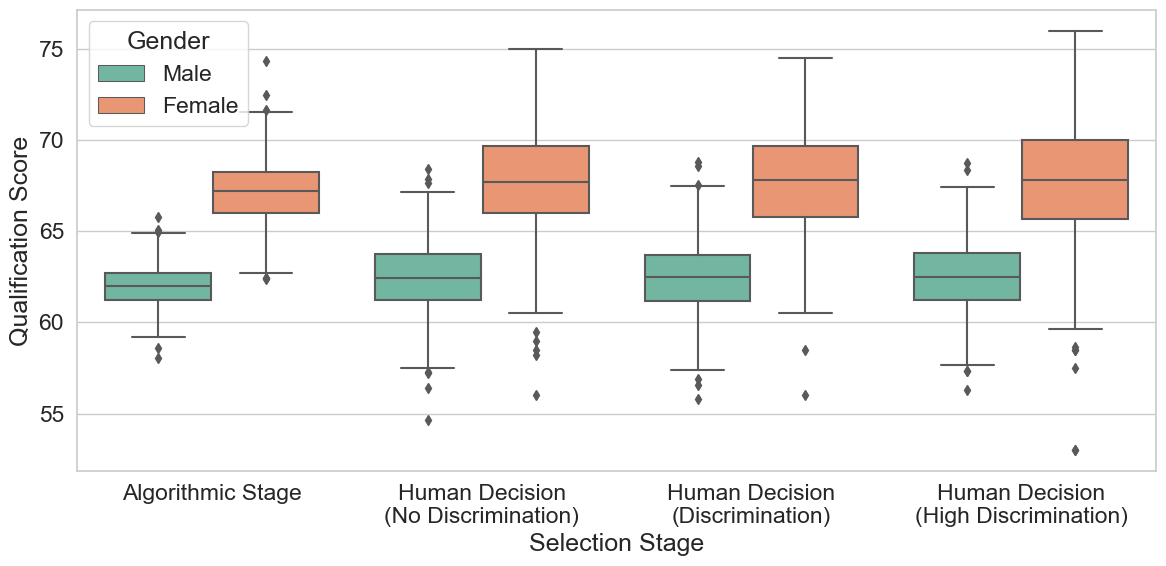

             Score
count  3991.000000
mean     64.945004
std       3.474625
min      53.000000
25%      62.187500
50%      64.545455
75%      67.545455
max      76.000000


In [42]:
# Example usage
fig, df = qual_plot.visualize_qualification_scores(
    qual_male_first_stage_df_lm_1,
    qual_female_first_stage_df_lm_1,
    qual_male_second_stage_df_lm_1,
    qual_female_second_stage_df_lm_1,
    show_debug=True
)

# Show the plot
plt.show()

# You can do more with the returned DataFrame if needed
print(df.describe())

# Simulation Evaluation

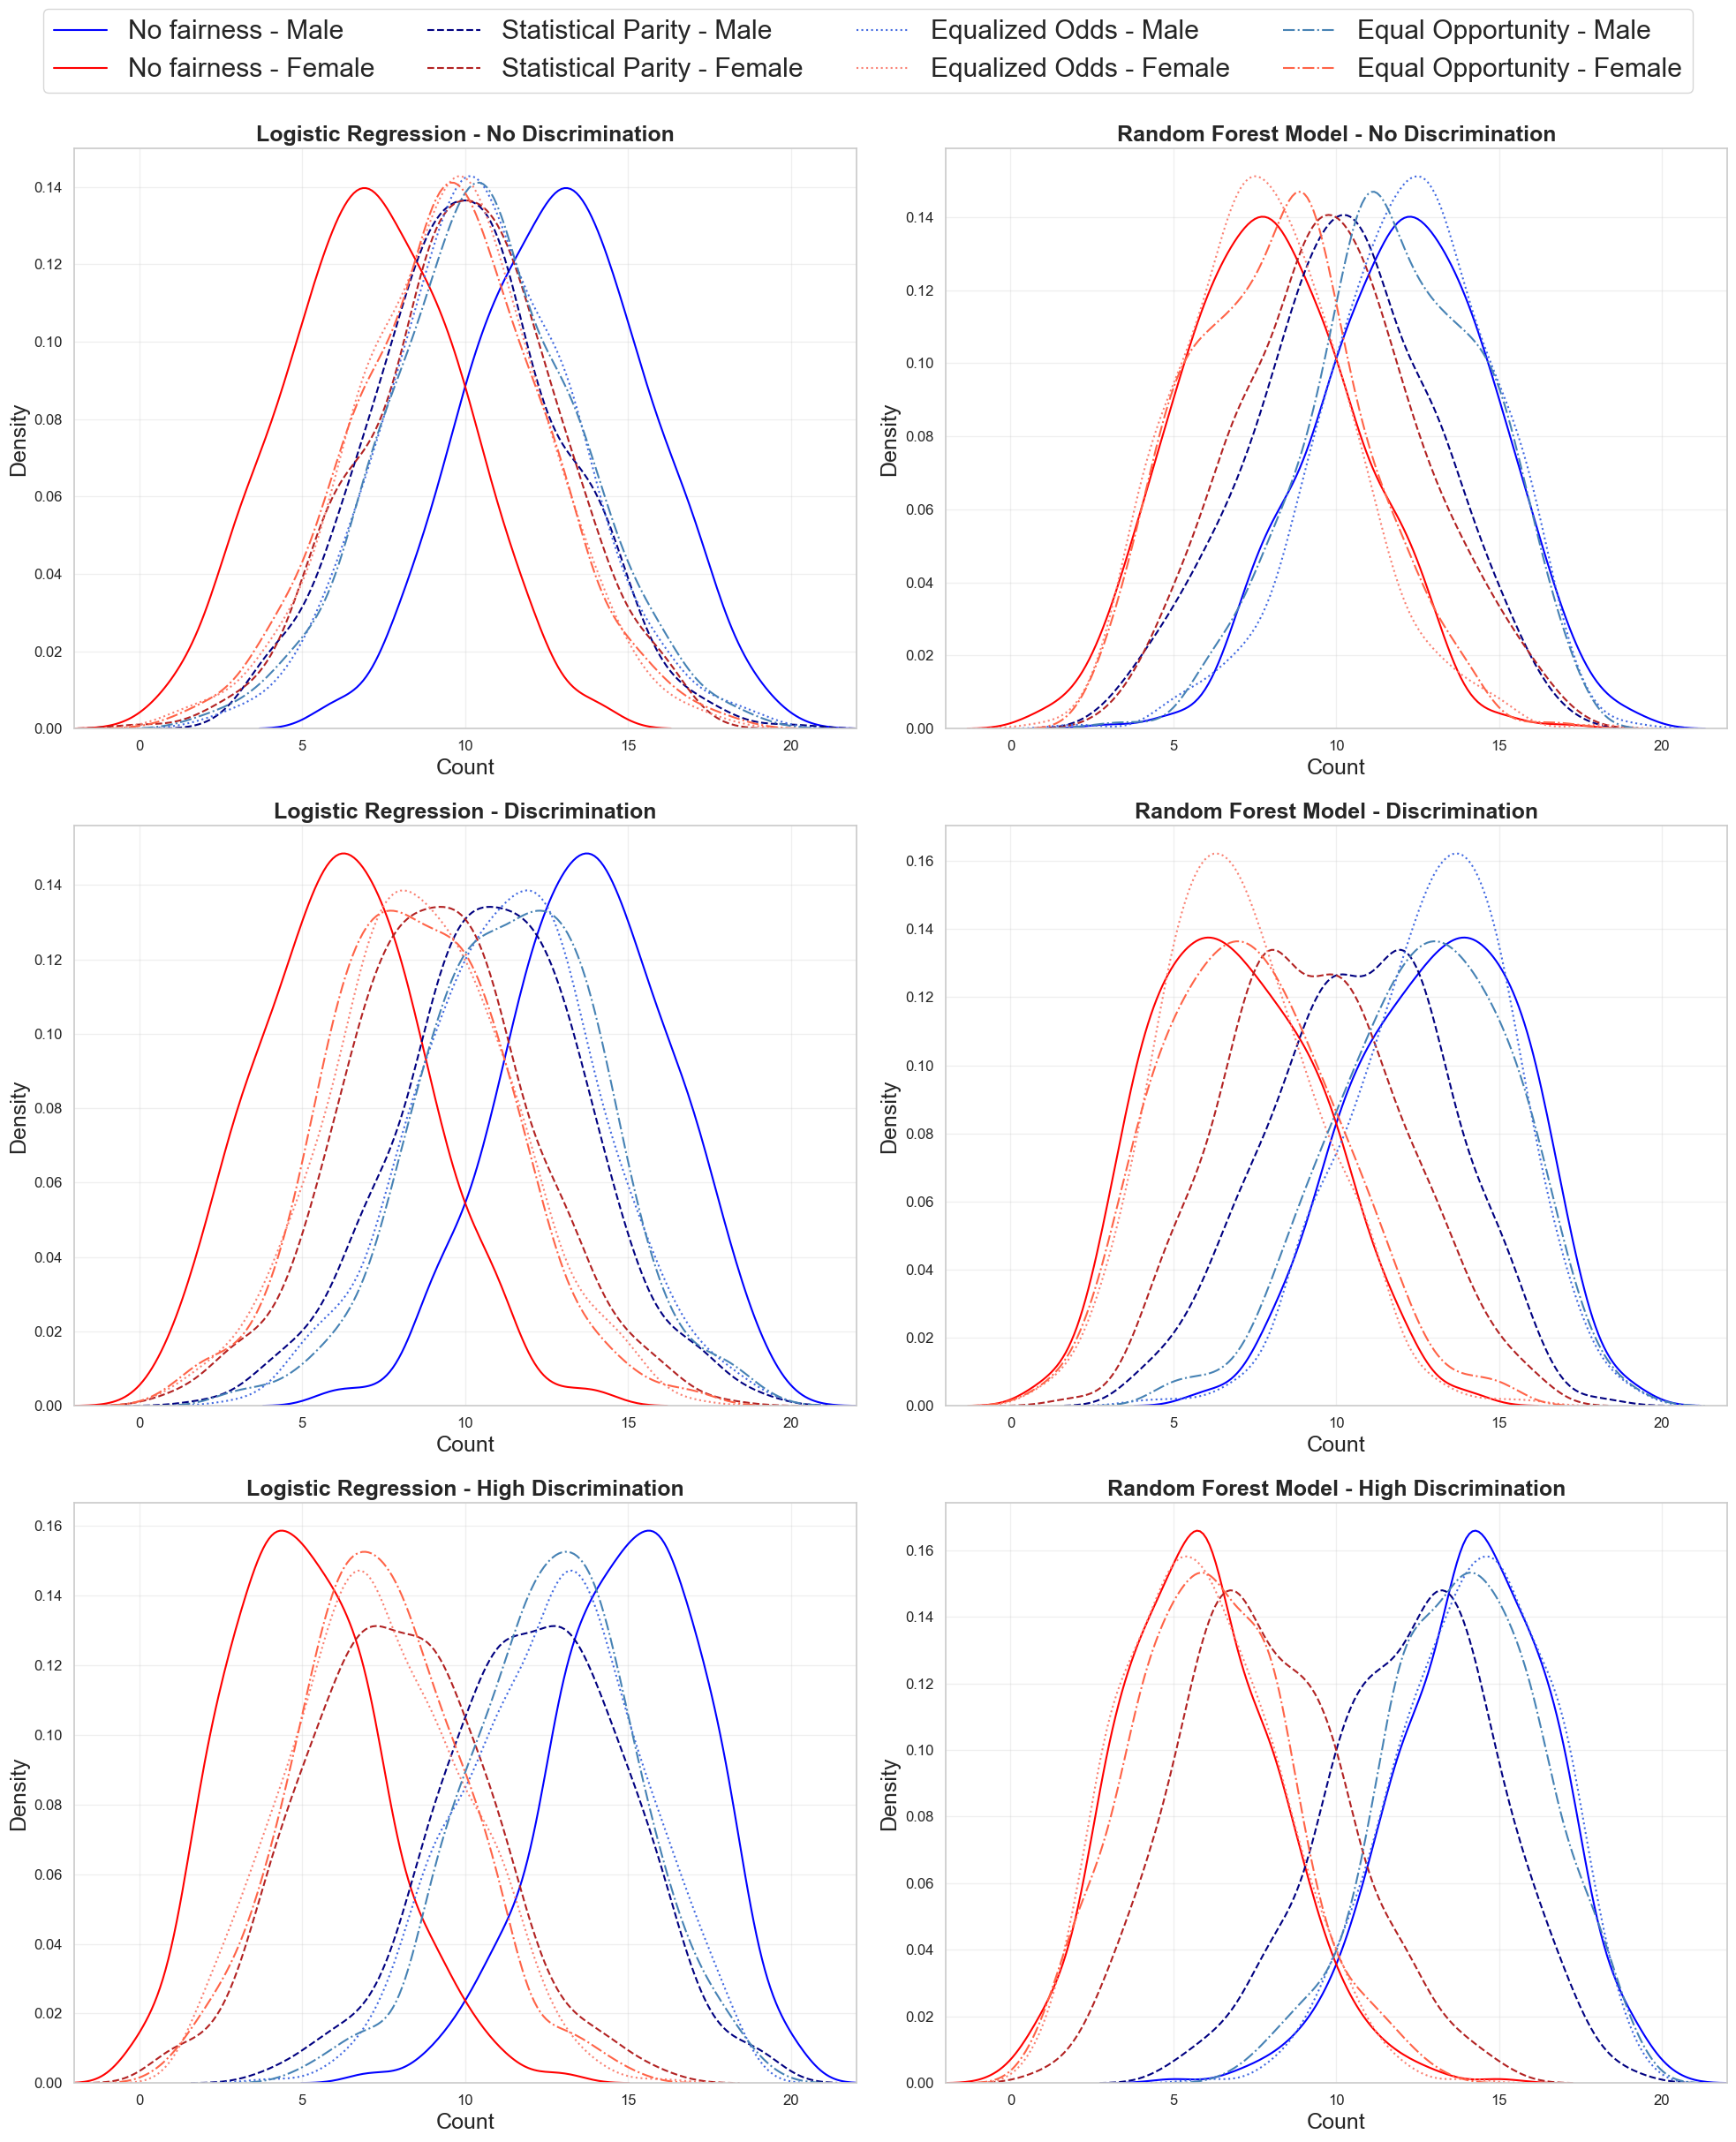

In [43]:
import matplotlib.pyplot as plt
import warnings

# Ignore specific FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# Define titles
logistic_titles = [
    "Logistic Regression - No Discrimination",
    "Logistic Regression - Discrimination",
    "Logistic Regression - High Discrimination"
]

rf_titles = [
    "Random Forest Model - No Discrimination",
    "Random Forest Model - Discrimination",
    "Random Forest Model - High Discrimination"
]

# Create a 3x2 subplot figure
fig, axes = plt.subplots(3, 2, figsize=(20, 24))

# Placeholder for handles and labels
legend_handles = None
legend_labels = None

# Plot Logistic Regression results (left column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_lm_1, results_lm_2, results_lm_3, results_lm_4), 
    logistic_titles
)):
    ax = axes[i, 0]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False  
    )
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()

# Plot Random Forest results (right column)
for i, ((res1, res2, res3, res4), title) in enumerate(zip(
    zip(results_rf_1, results_rf_2, results_rf_3, results_rf_4), 
    rf_titles
)):
    ax = axes[i, 1]
    sm_vis.plot_multiple_gender_distribution_kde_with_ax(
        res1, res2, res3, res4,
        labels=["No fairness", "Statistical Parity", "Equalized Odds", "Equal Opportunity"],
        title=title,
        ax=ax,
        show_legend=False
    )

# Add a single shared legend above all plots
fig.legend(
    legend_handles,
    legend_labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.02), 
    ncol=4,
    fontsize='large'
)

# Adjust layout to make room for the top legend
plt.tight_layout(rect=[0, 0, 1, 0.97])  

# Save and display
fig.savefig('graphics/combined_logistic_rf_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Qualification Evaluation

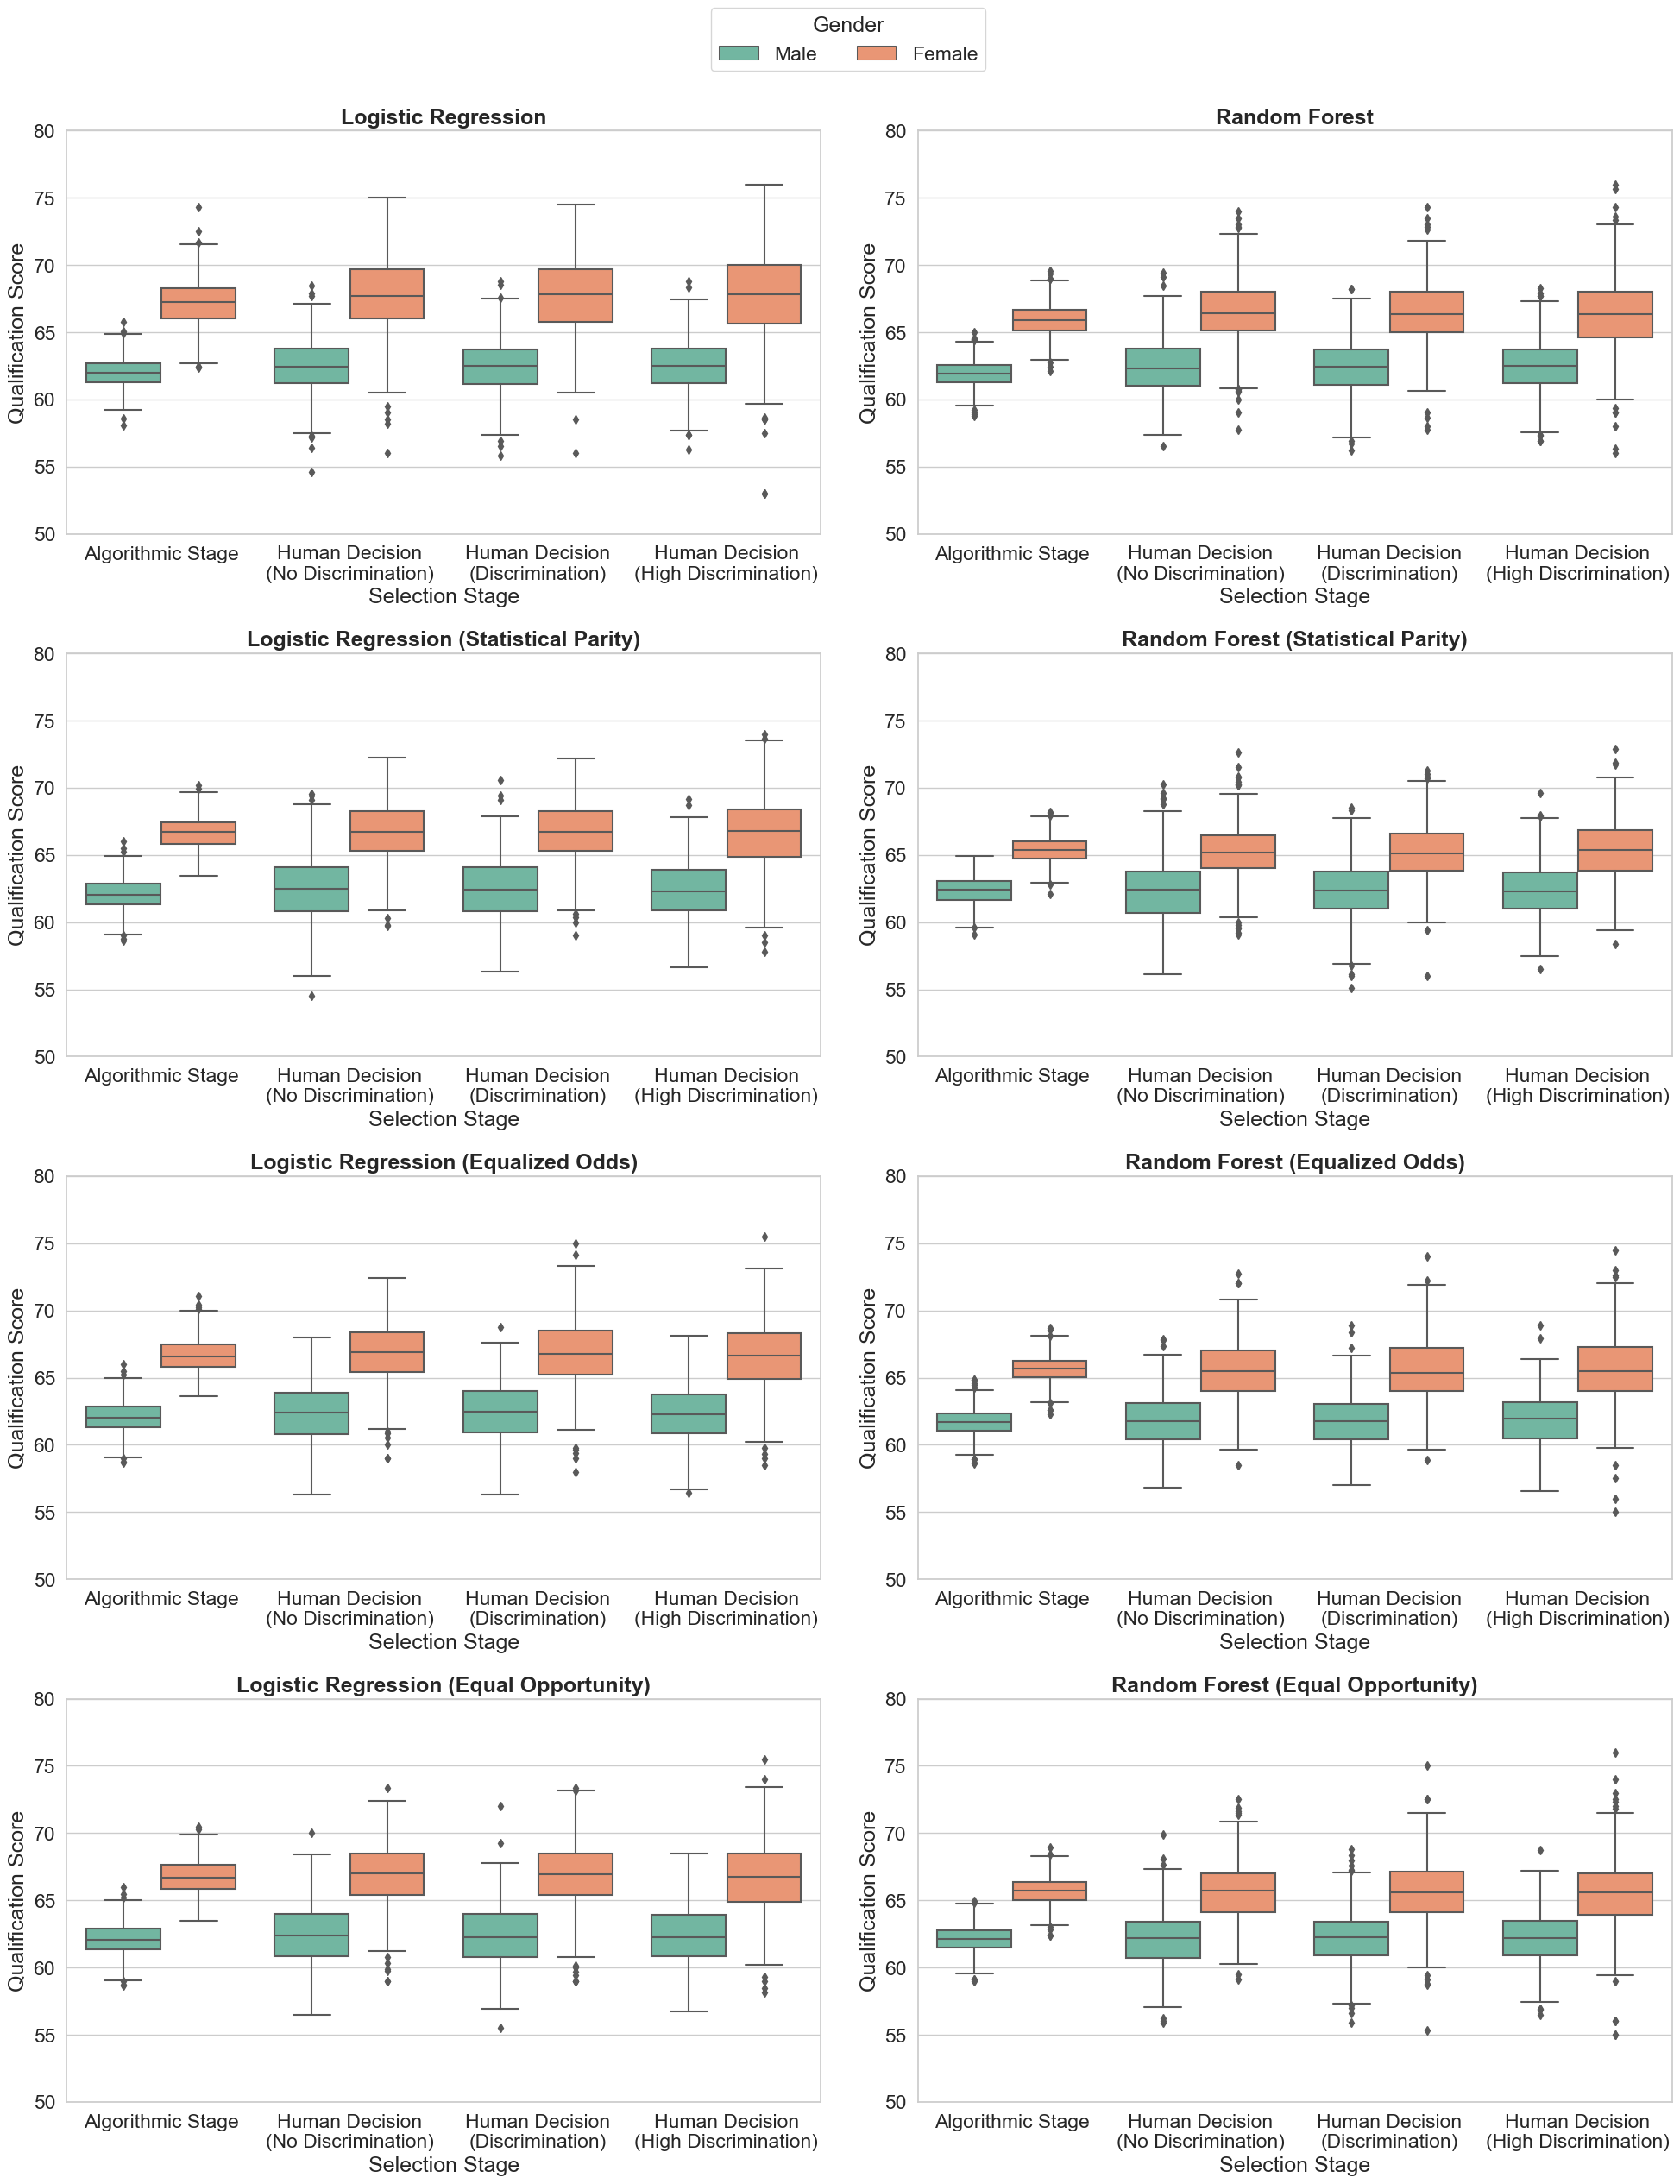

In [44]:
# Visualise Plot of Qualification
data_dict = {
    'rf_1': (
        qual_male_first_stage_df_rf_1,
        qual_female_first_stage_df_rf_1,
        qual_male_second_stage_df_rf_1,
        qual_female_second_stage_df_rf_1
    ),
    'rf_2': (
        qual_male_first_stage_df_rf_2,
        qual_female_first_stage_df_rf_2,
        qual_male_second_stage_df_rf_2,
        qual_female_second_stage_df_rf_2
    ),
    'rf_3': (
        qual_male_first_stage_df_rf_3,
        qual_female_first_stage_df_rf_3,
        qual_male_second_stage_df_rf_3,
        qual_female_second_stage_df_rf_3
    ),
    'rf_4': (
        qual_male_first_stage_df_rf_4,
        qual_female_first_stage_df_rf_4,
        qual_male_second_stage_df_rf_4,
        qual_female_second_stage_df_rf_4
    ),
    'lm_1': (
        qual_male_first_stage_df_lm_1,
        qual_female_first_stage_df_lm_1,
        qual_male_second_stage_df_lm_1,
        qual_female_second_stage_df_lm_1
    ),
    'lm_2': (
        qual_male_first_stage_df_lm_2,
        qual_female_first_stage_df_lm_2,
        qual_male_second_stage_df_lm_2,
        qual_female_second_stage_df_lm_2
    ),
    'lm_3': (
        qual_male_first_stage_df_lm_3,
        qual_female_first_stage_df_lm_3,
        qual_male_second_stage_df_lm_3,
        qual_female_second_stage_df_lm_3
    ),
    'lm_4': (
        qual_male_first_stage_df_lm_4,
        qual_female_first_stage_df_lm_4,
        qual_male_second_stage_df_lm_4,
        qual_female_second_stage_df_lm_4
    )
}

fig = qual_plot.visualize_qualification_grid(
    model_list=['lm_1', 'lm_2', 'lm_3', 'lm_4', 'rf_1', 'rf_2', 'rf_3', 'rf_4'],  
    variable_dict=data_dict,
    visualize_function=qual_plot.visualize_qualification_scores
)

plt.show()